In [1]:
from Functions import *
from Kernels import *
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad
import plotly.graph_objects as go


# 1D functions

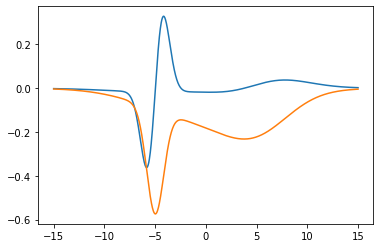

In [2]:
X = np.linspace(-15, 15, 1000)
inp = np.array([X])

out = flat_sharp_gaussian(inp)
out_grad = grad_flat_sharp_gaussian(inp)

plt.plot(X, out_grad[0])
plt.plot(X, out)
plt.show()


# 2D functions

In [27]:
def multi_gaussian(cov):
    def multi_gaussian_helper(inp, mu):
        """same mu for every datapoint given in ipn"""
        k = inp.shape[0]
        diff = (inp.T - mu).T        
        return 1 / np.sqrt(pow(2 * np.pi, k) * np.linalg.det(cov)) * np.exp(
            -0.5 * np.sum(diff*(np.linalg.inv(cov).dot(diff)), axis=0))
    return multi_gaussian_helper

In [33]:
X = np.linspace(-15, 15, 100)
Y = np.linspace(-15, 15, 100)

inp = np.array(np.meshgrid(X, Y)).reshape(2, len(X)*len(Y))

out = flat_sharp_gaussian(inp)

out = out.reshape(len(X), len(Y))

In [30]:
X

array([-15.        , -14.6969697 , -14.39393939, -14.09090909,
       -13.78787879, -13.48484848, -13.18181818, -12.87878788,
       -12.57575758, -12.27272727, -11.96969697, -11.66666667,
       -11.36363636, -11.06060606, -10.75757576, -10.45454545,
       -10.15151515,  -9.84848485,  -9.54545455,  -9.24242424,
        -8.93939394,  -8.63636364,  -8.33333333,  -8.03030303,
        -7.72727273,  -7.42424242,  -7.12121212,  -6.81818182,
        -6.51515152,  -6.21212121,  -5.90909091,  -5.60606061,
        -5.3030303 ,  -5.        ,  -4.6969697 ,  -4.39393939,
        -4.09090909,  -3.78787879,  -3.48484848,  -3.18181818,
        -2.87878788,  -2.57575758,  -2.27272727,  -1.96969697,
        -1.66666667,  -1.36363636,  -1.06060606,  -0.75757576,
        -0.45454545,  -0.15151515,   0.15151515,   0.45454545,
         0.75757576,   1.06060606,   1.36363636,   1.66666667,
         1.96969697,   2.27272727,   2.57575758,   2.87878788,
         3.18181818,   3.48484848,   3.78787879,   4.09

In [34]:
fig = go.Figure(data=[go.Surface(z=out, x=X, y=Y, colorscale="Viridis")])

fig.update_layout(title='Function', autosize=False,
                  width=1000, height=800,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()